# Redes Neuronales Convolucionales

En este ejercicio se implementaran las capas convolucionales (CONV) y de agrupación (POOL) en numpy, incluidas tanto la propagación hacia adelante como la propagación hacia atrás. 

**Notación**:
- Superíndice $[l]$ denota un objeto de la capa $l^{th}$. 
    - Ejemplos: $a^{[4]}$ es la $4^{ta}$ capa de activación. $W^{[5]}$ y $b^{[5]}$ son los parámetros de la $5^{ta}$ capa.


- Superíndice $(i)$ denota un objeto del i-ésimo ejemplo. 
    - Ejemplo: $x^{(i)}$ es el i-ésimo ejemplo de entrenamiento de entrada.
    
    
- Subíndice $i$ denota la i-ésima entrada de un vector.
    - Ejemplo: $a^{[l]}_i$ denota la i-ésima entrada de las activaciones en la capa $l$, asumiendo que esta es una capa completamente conectada.
    
    
- $n_H$, $n_W$ y $n_C$ denotan respectivamente la altura, el ancho y el número de canales de una capa determinada. Si quieres hacer referencia a una capa específica $l$, también se puede escribir $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$. 

- $n_{H_{prev}}$, $n_{W_{prev}}$ y $n_{C_{prev}}$ denotan respectivamente la altura, el ancho y el número de canales de la capa anterior. Si hace referencia a una capa específica $l$, esto también podría ser denotado $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$. 


## 1 - Paquetes

Primero importemos todos los paquetes que necesitará durante este ejercicio.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Esquema del ejercicio

Se implementarán los bloques de construcción de una red neuronal convolucional! Cada función que implementará tendrá instrucciones detalladas que lo guiarán por los pasos necesarios:

- Funciones de convolución, que incluyen:
     - Relleno con ceros
     - Ventana de convolución
     - Convolución hacia adelante
     - Convolución hacia atrás
- Funciones de agrupamiento, que incluyen:
     - Agrupando hacia adelante
     - Crear máscara
     - Distribuir valor
     - Agrupando hacia atrás (opcional)
    
En este ejercicio se implementaran estas funciones desde cero en `numpy`. En el siguiente ejercicio, se usará los equivalentes de TensorFlow de estas funciones para construir el siguiente modelo:

<img src="figuras/arquitectura_cnn.png" style="width:800px;height:300px;">

**Tenga en cuenta** que para cada función hacia adelante, existe su correspondiente equivalente hacia atrás. Por lo tanto, en cada paso de los módulos hacia adelante almacenará algunos parámetros en un caché. Estos parámetros se usan para calcular gradientes durante la propagación hacia atrás. 

## 3 - Redes Neuronales Convolucionales

Aunque los frameworks de programación hacen que las convoluciones sean fáciles de usar, siguen siendo uno de los conceptos más difíciles de entender en Deep Learning. Una capa de convolución transforma un volumen de entrada en un volumen de salida de diferentes tamaños, como se muestra a continuación.

<img src="figuras/RNC.png" width="75%">

In this part, you will build every step of the convolution layer. You will first implement two helper functions: one for zero padding and the other for computing the convolution function itself. 

### 3.1 - Relleno con ceros

Relleno con ceros agrega ceros alrededor del borde de la imagen:

<img src="figuras/relleno_con_ceros.png" width="75%">
<caption><center> <u> <font color='purple'> **Figura 1** </u><font color='purple'>  : **Relleno con ceros**<br> Imagen (3 canales, RGB) con un relleno de 2. </center></caption>

Los principales beneficios del relleno son los siguientes:
- Permite usar una capa de convolución sin necesariamente contraer la altura y el ancho de los volúmenes. Esto es importante para construir redes más profundas, ya que de lo contrario la altura/ancho se reduciría a medida que se avanza hacia capas más profundas. Un caso especial importante es la convolución "misma", en la que el alto/ancho se conserva exactamente después de una capa.
- Nos ayuda a mantener más información en el borde de una imagen. Sin relleno, muy pocos valores en la siguiente capa se verían afectados por los píxeles de los bordes de una imagen.

Implementar la siguiente función, que rellena todas las imágenes de un lote de ejemplos X con ceros. [Usar np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html). Tenga en cuenta si desea rellenar la matriz "a" de la forma $(5,5,5,5,5)$ con `pad = 1` para la 2ª dimensión,` pad = 3` para la 4ª dimensión y `pad = 0` para el resto, harías:
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = (..,..))
```

In [2]:
# FUNCIÓN: relleno_cero

def relleno_cero(X, relleno):
    """
    Rellena con ceros todas las imágens del conjunto de datos X. El relleno se aplica
    a la altura y el ancho de la imagenT como se muestra en la Figura 1.
    
    Argumentos:
    X -- un arreglo numpy python de forma (m, n_H, n_W, n_C) representando un lote de imágenes
    relleno -- integer, cantidad de relleno alrededor de cada imagen sobre las dimensions vertical y horizontal
    
    Retorna:
    X_relleno -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    X_relleno = np.pad(X, ((0,0),(relleno,relleno),(relleno,relleno),(0,0)), 'constant')
    
    return X_relleno

x.shape = (4, 3, 3, 2)
x_relleno.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_relleno[1,1] = [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


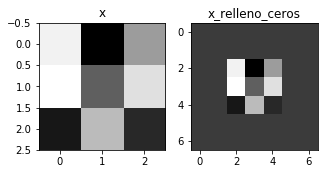

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_relleno = relleno_cero(x, 2)
print ("x.shape =", x.shape)
print ("x_relleno.shape =", x_relleno.shape)
print ("x[1,1] =", x[1,1])
print ("x_relleno[1,1] =", x_relleno[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_relleno_ceros')
axarr[1].imshow(x_relleno[0,:,:,0])

### 3.2 - Paso único de convolución
En esta parte, implemente un solo paso de convolución, en el cual aplica el filtro a una posición única de la entrada. Esto se usará para construir una unidad convolucional, que:
- Toma un volumen de entrada
- Aplica un filtro en cada posición de la entrada
- Emite otro volumen (generalmente de diferente tamaño)

<h3 style="text-align: center;" markdown="1">`.            Imagen                 Resultado Convolución`</h3>

<img src="figuras/convolucion.gif" width="50%">
<caption><center> <u> <font color='purple'> **Figura 2** </u><font color='purple'>  : **Operación de Convolución**<br> con un filtro 2x2 y un paso de 1 (paso = cantidad que se mueve la ventana cada vez que se desliza) </center></caption>

En una aplicación de visión por computadora, cada valor en la matriz de la izquierda corresponde a un único valor de píxel, y convolvemos un filtro de 3x3 con la imagen multiplicando sus valores elemento por elemento con la matriz original, y luego los sumamos. En este primer paso del ejercicio, implementará un solo paso de convolución, que corresponde a la aplicación de un filtro a solo una de las posiciones para obtener una única salida de valor real.

Más adelante, se aplicará esta función a múltiples posiciones de la entrada para implementar la operación convolucional completa.

Implementar `conv_paso_sencillo`(). Usar `numpy.sum`.

In [9]:
# FUNCIÓN: conv_paso_sencillo

def conv_paso_sencillo(a_trozo_prev, W, b):
    """
    Aplicar un filtro definido por los parámetros W sobre un trozo (a_trozo_prev) de la salida de activación 
    de la capa previa.
    
    Arguments:
    a_trozo_prev -- trozo de los datos de entrada con forma (f, f, n_C_prev)
    W -- Parámetros de pesos contenidos en la ventana con forma (f, f, n_C_prev)
    b -- Parámetros de sesgos contenidos en la ventana con forma (1, 1, 1)
    
    Retorna:
    Z -- un valor escalar, resultado de convolver la ventana deslizante (W, b) sobre un trozo x de los datos de entrada
    """

    # Producto elemento por elemento entre una_rodaja y W. Sumar sesgos.
    s = (a_trozo_prev * W) + b
    # Sumar sobre todas las entradas del volume s
    Z = np.sum(s)
    

    return Z

In [10]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_paso_sencillo(a_slice_prev, W, b)
print("Z =", Z)

Z = -23.1602122025


### 3.3 - Redes neuronales convolucionales - Propagación hacia adelante

En la propagación hacia adelante, se tomarán muchos filtros y los convolverá con la entrada. Cada 'convolución' da una matriz de salida de 2D. A continuación, se apilarán estas salidas para obtener un volumen de 3D:

<center>
<video width="620" height="440" src="figuras/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>

Implementar la función siguiente para convolver los filtros W sobre una activación de entrada A_prev. Esta función toma como entrada A_prev, las activaciones producidas por la capa previa (para un lote de m entradas), F filtros/pesos denotados por W, y un vector de sesgo denotado por b, donde cada filtro tiene su propio (único) sesgo. Finalmente, también tiene acceso al diccionario de hiperparámetros que contiene el paso y el relleno. 

**Pista**:
1. Para seleccionar un corte de 2x2 en la esquina superior izquierda de una matriz "a_prev" (forma (5,5,3)), se haría:
```python
a_pedazo_prev = a_prev [0: 2,0: 2 ,:]
```
Esto será útil cuando defina `a_pedazo_prev` a continuación, usando los índices `inicio/fin` que definirá.
2. Para definir a_pedazo, primero deberá definir sus esquinas `vert_inicio`, `vert_fin`, `horiz_inicio` y `horiz_fin`. Esta figura puede ser útil para que encuentre cómo cada esquina se puede definir usando h, w, f y s en el código a continuación.

<img src="figuras/pedazo_coord.png" width="75%">
<caption><center> <u> <font color='purple'> **Figura 3** </u><font color='purple'>  : **Definición de un trozo de la matriz usando los indices inicio/fin tanto vertical como horizontal (con un filtro 2x2 )** <br> Esta figura mustra un solo canal.  </center></caption>


**Recordar**:
Las formulas que relacionan  la forma de salida de la convolución con la forma de la entrada son:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times relleno}{paso} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times relleno}{paso} \rfloor +1 $$

$$ n_C = \text{número de filtros usados en la convolución}$$


In [11]:
# FUNCiÓN: conv_hacia_adelante

def conv_hacia_adelante(A_prev, W, b, hparametros):
    """
    Implemanta la propagación hacia adelate para una función de convolución
    
    Argumentos:
    A_prev -- activaciones de salida de la capa anterior, arreglo numpy de forma (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Pesos, arreglo numpy de forma (f, f, n_C_prev, n_C)
    b -- Sesgos, arreglo numpy de forma (1, 1, 1, n_C)
    hparametros -- diccionario python conteniendo "paso" and "relleno"
        
    Retorna:
    Z -- salida convolución, arreglo numpy de forma (m, n_H, n_W, n_C)
    cache -- cache de valores necesarios para la función conv_hacia_atras()
    """
    
    # Leer las dimensiones de la forma de A_prev  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Leer las dimensiones de la forma de W
    (f, f, n_C_prev, n_C) = W.shape
    
    # Leer la información de "hparametros" (≈2 lines)
    paso = hparametros['paso']
    relleno = hparametros['relleno']
    
    # Calcular las dimensiones del volumen de salida de la convolución
    # Usando la formula dada arriba.
    n_H = int((n_H_prev - f + 2*relleno)/(paso)) + 1
    n_W = int((n_W_prev - f + 2*relleno)/(paso)) + 1
    
    # Initializar el volumen de salida Z con ceros.
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Crear A_prev_relleno rellenando A_prev
    A_prev_relleno = relleno_cero(A_prev, relleno)
    for i in range(m):                                 # repetir sobre el lote de ejemplos de entrenamiento
        a_prev_relleno = A_prev_relleno[i,:,:,:]       # Seleccionar la activación con relleno del i-ésimo ejemplo de entrenamineto
        for h in range(n_H):                           # repetir sobre el eje vertical del volumen de salida
            for w in range(n_W):                       # repetir sobre el eje horizontal del volumen de salida
                for c in range(n_C):                   # repetir sobre los canales (= #filtros) del volumen de salida
                    
                    # Encontrar las esquinas del "trozo" actual 
                    vert_inicio = h
                    vert_fin = h + f
                    horiz_inicio = w
                    horiz_fin = w + f
                    # Usar las esquinas para definir el trozo (3D) de a_prev_relleno 
                    a_trozo_prev = a_prev_relleno[vert_inicio:vert_fin,horiz_inicio:horiz_fin,:]
                    # Convolver el trozo (3D) con el filtro W y sesgo b correctos, para obtener una neurona de salida.
                    Z[i, h, w, c] = conv_paso_sencillo(a_trozo_prev, W[:,:,:,c], b[:,:,:,c])
                    
    
    # Asegurarse que la froma de salida este correcta
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Guardar información en la "cache" para la prpagación hacia atras
    cache = (A_prev, W, b, hparametros)
    
    return Z, cache

In [12]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparametros = {"relleno" : 2,
               "paso": 1}

Z, cache_conv = conv_hacia_adelante(A_prev, W, b, hparametros)
print("Z's mean =", np.mean(Z))
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.155859324889
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


Finalmente, la capa de convolución debe también contener una activación, en ese caso, agregaríamos la siguiente línea de código:

```python
# Convolver el trozo (3D) con el filtro W y sesgo b correctos, para obtener una neurona de salida.
Z[i, h, w, c] = conv_paso_sencillo(a_trozo_prev, W[:,:,:,c], b[:,:,:,c])
# Aplicar activación
A[i, h, w, c] = activacion(Z[i, h, w, c])
``` 


## 4 - Capa de Reducción "Pooling"

La capa de reducción "pooling" reduce la altura y anchura de la entrada. Ayuda a reducir la computación, como también ayuda al detector de características más invariante a su posición en la entrada. Los dos tipos de capas de reducción son:

- Capa de reducción valor máximo: desliza una ventana ($f, f$) sobre la entrada y almacena el valor máximo de la ventana en la salida.

- Capa de reducción valor promedio: desliza una ventana ($f, f$) sobre la entrada y almacena el valor promedio de la ventana en la salida.

<img src="figuras/reduccion_max.png" width="50%">

<img src="figuras/reduccion_avg.png" width="50%">


Estas capas de reducción no tienen parámetros que entrenar en la propagación hacia atras. Sin embargo, tienen hiperparámetros como el tamaño de la ventana $f$. Esto especifica el alto y el ancho de la ventana $f \times f$ sobre la que se calcularía el máximo o el promedio. 

### 4.1 - Redución hacia adelante
Ahora, implementará `reducción_max` y `reduccion_avg`, en la misma función. 

**Ejercicio**: Implementar la propagación hacia adelante de la capa de reducción.

**Recordar**:
Como no hay relleno, las fórmulas que vinculan la forma de salida de la reducción a la forma de entrada son:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{paso} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{paso} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [13]:
# FUNCCIÓN: reduccion_hacia_adelante

def reduccion_hacia_adelante(A_prev, hparametros, modo = "max"):
    """
    Implementa la propagación hacia adelante de la capa de reducción
    
    Argumentos:
    A_prev -- Datos de entrada, arreglo numpy de forma (m, n_H_prev, n_W_prev, n_C_prev)
    hparametros -- diccionario python conteniendo "f" y "paso"
    modo -- el modo de reducción a utilizar, definido como un string ("max" or "average")
    
    Retorna:
    A -- salida de la capa de reducción, arreglo numpy de forma (m, n_H, n_W, n_C)
    cache -- cache de valores necesarios para la propagación hacia atrás de la capa de reducción,
    contiene los datos de entrada y los hparametros 
    """
    
    # Leer las dimensiones de la forma de la entrads
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Leer los hyperparámetros desde "hparametros"
    f = hparametros["f"]
    paso = hparametros["paso"]
    
    # Definir las dimensiones de la salida
    n_H = int(1 + (n_H_prev - f) / paso)
    n_W = int(1 + (n_W_prev - f) / paso)
    n_C = n_C_prev
  
    # Initializar la matriz de salida A
    A = np.zeros((m, n_H, n_W, n_C))              
   
    for i in range(m):                          # repetir sobre el lote de ejemplos de entrenamiento
        for h in range(n_H):                    # repetir sobre el eje vertical del volumen de salida
            for w in range(n_W):                # repetir sobre el eje horizontal del volumen de salida
                for c in range(n_C):            # repetir sobre los canales (= #filtros) del volumen de salida
                    
                    # Encontrar las esquinas del "trozo" actual
                    vert_inicio = h
                    vert_fin = h + f
                    horiz_inicio = w
                    horiz_fin = w + f
                    
                    # Usar las esqunas para definir el trozo actual del i-ésimo ejemplo de entrenamiento
                    # de A_prev, y canal c.
                    a_trozo_prev = A_prev[i,vert_inicio:vert_fin,horiz_inicio:horiz_fin,c]
                    
                    # Computar la operación de reducción sobre el trozo dependiendo del modo. Usar np.max/np.mean.
                    if modo == "max":
                        A[i, h, w, c] = np.max(a_trozo_prev)
                    elif modo == "average":
                        A[i, h, w, c] = np.mean(a_trozo_prev)

    # Almacenar la entrada y los hiperparámetros en el "cache" para la reduccion_hacia_atras()
    cache = (A_prev, hparametros)

    # Asegurarse que la forma de la salida es la corecta
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [14]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparametros = {"paso" : 1, "f": 4}

A, cache = reduccion_hacia_adelante(A_prev, hparametros)
print("modo = max")
print("A =", A)
print()
A, cache = reduccion_hacia_adelante(A_prev, hparametros, modo = "average")
print("modo = average")
print("A =", A)

modo = max
A = [[[[ 1.74481176  1.6924546   2.10025514]]]


 [[[ 1.19891788  1.51981682  2.18557541]]]]

modo = average
A = [[[[-0.09498456  0.11180064 -0.14263511]]]


 [[[-0.09525108  0.28325018  0.33035185]]]]


Congratulations! You have now implemented the forward passes of all the layers of a convolutional network. 

The remainer of this notebook is optional, and will not be graded.


## 5 - Propagación hacia atrás en la redes neuronales convolucionales

En los "frameworks" modernos de aprendizaje profundo, solo se tiene que implementar la propagación hacia adelante, y el "frameworks" se encarga de la propagación hacia atrás, por lo que no es necesitan preocuparse por los detalles de la propagación hacia atrás. La propagación hacia atrás en las redes convolucionales es complicada.

Al igual que en una red neuronal simple (totalmente conectada), donde se usó la propagación hacia atras para calcular los derivadas con respecto al costo para actualizar los parámetros. De manera similar, en las redes neuronales convolucionales se puede calcular las derivadas con respecto al costo para actualizar los parámetros. Las ecuaciones de backprop no son triviales y se presentan brevemente a continuación.

### 5.1 - Propagación hacia atrás en la capa convolucional 

Iniciemos implementado la propagación hacia atrás en una capa convolucional. 

#### 5.1.1 - Computar dA:
Esta es la fórmula para calcular $dA$ con respecto al costo de un determinado filtro $W_c$ y un ejemplo de entrenamiento dado:

$$ dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$$

Donde $W_c$ es un filtro y $dZ_{hw}$ es un escalar correspondiente al gradiente del costo con respecto a la salida de la capa convolucional Z en la h-ésima fila y la w-ésima columna (correspondiente al producto punto tomado en el i-ésimo paso a la izquierda y el j-ésimo paso hacia abajo). Tenga en cuenta que en cada momento, multiplicamos el mismo filtro $W_c$ por un $dZ$ diferente cuando se actualiza $dA$. Lo hacemos principalmente porque al calcular la propagación hacia adelante, cada filtro se multiplica y se suma con un a_trozo diferente. Por lo tanto, al calcular la propagación hacia atrás para $dA$, solo estamos agregando los gradientes de todos los a_trozos. 

En código, dentro del lazo `for` apropiado, la formula se traduce a:
```python
da_prev_relleno[vert_inicio:vert_fin, horiz_inicio:horiz_fin, :] += W[:,:,:,c] * dZ[i, h, w, c]
```

#### 5.1.2 - Computar dW:
Esta es la fórmula para calcular $dW_c$ ($dW_c$ es la derivada de un filtro) con respecto a la pérdida:

$$ dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$

Donde $a_{trozo}$ corresponde al trozo que se usó para generar la acitivación $Z_{ij}$. Por lo tanto, esto termina dándonos el gradiente de $W$ con respecto a ese trozo. Dado que es el mismo $W$, sumaremos todos los gradientes para obtener $dW$. 

En código, dentro del lazo `for` apropiado, la formula se traduce a:
```python
dW[:,:,:,c] += a_trozo * dZ[i, h, w, c]
```

#### 5.1.3 - Computar db:

Esta es la fórmula para calcular $db$ con respecto al costo de el filtro $W_c$:

$$ db = \sum_h \sum_w dZ_{hw} \tag{3}$$

Como ya se habia visto en redes neuronales multicapas, $db$ se calcula sumando $dZ$. En este caso, solo está sumando todos los gradientes de la salida de la convolución (Z) con respecto al costo.

En código, dentro del lazo `for` apropiado, la formula se traduce a:
```python
db[:,:,:,c] += dZ[i, h, w, c]
```

Implementar la función the `conv_hacia_atras`. SE debe sumar sobre todos los ejemplos de entrenamiento, filtros, alturas y anchuras. A continuación, debe calcular las derivadas utilizando las fórmulas 1, 2 y 3 anteriores. 

In [116]:
def conv_hacia_atras(dZ, cache):
    """
    Implementa la propagación hacia atrás para una función de convolución
    
    Argumentos:
    dZ -- gradiente del costo con respecto a la salida de la capa de convolución (Z), arreglo numpy de forma (m, n_H, n_W, n_C)
    cache -- cache de los valores necesitados por conv_hacia_atras(), salida de of conv_hacia_adelante
    
    Retorna:
    dA_prev -- gradiente del costo con respecto a la entrada de la capa de convolución (A_prev),
               arreglo numpy de forma (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradiente del costo con respecto a los pesos de la capa de convolución (W)
          arreglo numpy de forma (f, f, n_C_prev, n_C)
    db -- gradiente del costo con respecto a los sesgos de la capa de convolución (b)
          arreglo numpy de forma (1, 1, 1, n_C)
    """
    
    # Leer la información del "cache"
    (A_prev, W, b, hparametros) = cache
    
    # Leer las dimensiones de la forma de A_prev
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Leer las dimensiones de la forma de W
    (f, f, n_C_prev, n_C) = W.shape
    
    # Leer la información de los "hparametros"
    paso = hparametros['paso']
    relleno = hparametros['relleno']
    
    # Leer las dimensiones de la forma de dZ
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Initializar dA_prev, dW, db con las fromas correctas
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    # Rellenar A_prev y dA_prev
    A_prev_relleno = relleno_cero(A_prev, relleno)
    dA_prev_relleno =  relleno_cero(dA_prev, relleno)
    
    for i in range(m):                       # repetir sobre el lote de ejemplos de entrenamiento
        
        # selecciona el i-ésimo ejemplo de entrenamiento de A_prev_relleno y dA_prev_relleno
        a_prev_relleno = A_prev_relleno[i,:,:,:]
        da_prev_relleno = dA_prev_relleno[i,:,:,:]
        
        for h in range(n_H):                    # repetir sobre el eje vertical del volumen de salida
            for w in range(n_W):                # repetir sobre el eje horizontal del volumen de salida
                for c in range(n_C):            # repetir sobre los canales (= #filtros) del volumen de salida
                    
                    # Encontrar las esquinas del "trozo" actual
                    vert_inicio = h
                    vert_fin = h + f
                    horiz_inicio = w
                    horiz_fin = w + f
                    
                    # Usar las esquinas para definir el trozo de a_prev_relleno
                    a_trozo = a_prev_relleno[vert_inicio:vert_fin,horiz_inicio:horiz_fin,:]

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_relleno[vert_inicio:vert_fin, horiz_inicio:horiz_fin, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_trozo * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # fijar el i-ésimo ejemplo de entrenamineto de dA_prev al da_prev_relleno sin rellenar
        dA_prev[i, :, :, :] = dA_prev_relleno[i, relleno:-relleno, relleno:-relleno, :]

    
    # Asegurarse que la forma de la salida es la corecta
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [117]:
np.random.seed(1)
dA, dW, db = conv_hacia_atras(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 9.60899067587
dW_mean = 10.5817412755
db_mean = 76.3710691956


## 5.2 Capa de Reducción - propagación hacia atrás

A continuación, implementemos la propagación hacia atrás para la capa de reducción, comenzando con la capa reducción por valor m®aximo. Aunque una capa de reducción no tiene parámetros para que propagación hacia atrás actualice, se necesita volver a propagar el gradiente a través de la capa de reducción para calcular los gradientes de las capas anteriores de la capa de reducción. 

### 5.2.1 Reducción por valor máximo - propagación hacia atrás  

Antes de implementar la propagación hacia atrás de la capa de reducción, construir una función auxiliar llamada `crear_mascara_ventana()` que hace lo siguiente: 

$$ X = \begin{bmatrix}
1 && 3 \\
4 && 2
\end{bmatrix} \quad \rightarrow  \quad M =\begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}\tag{4}$$

Esta función crea una matriz de "máscara" que realiza un seguimiento de dónde está el máximo de la matriz. `True` (1) indica la posición del máximo en X, las otras entradas son `False` (0). La propagación hacia atrás para la reducción por valor promedio será similar a esta pero usando una máscara diferente.  

Implementar `crear_mascara_ventana(()`. Esta función será útil para reducción hacia atrás. 

In [118]:
def crear_mascara_ventana(x):
    """
    Crea una mascara a partir de una matriz de entrada x, para identificar la entrada máxima de x.
    
    Argumentos:
    x -- Arreglo de forma (f, f)
    
    Retorna:
    mascara -- Arreglo de la misma forma de la ventana, contiene un True en la posición del máximo de x.
    """
    
    mascara = x[:,:] == np.max(x)
    
    return mascara

In [120]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = crear_mascara_ventana(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


¿Por qué hacemos un seguimiento de la posición del máximo? Es porque este es el valor de entrada que finalmente influyó en la salida y, por lo tanto, en el costo. Prpagación hacia atrás está calculando gradientes con respecto al costo, por lo que cualquier cosa que influya en el costo final debería tener un gradiente distinto de cero. Por lo tanto, propagación hacia atrás "propagará" el gradiente a este valor de entrada particular que ha influido en el costo.

### 5.2.2 -  Reducción por valor promedio - propagación hacia atrás

En la reducciónp por valor máximo, para cada ventana de entrada, toda la "influencia" en la salida proviene de un único valor de entrada: el máximo. En la agrupación promedio, cada elemento de la ventana de entrada tiene la misma influencia en la salida. Entonces, para implementar propagación hacia atrás, se implementará una función auxiliar que refleja esto.

Por ejemplo, si hicimos reducción por valor promedio en la propagación hacia adelante usando un filtro de $2 \times 2$, entonces la máscara que se usará para la prpagación hacia atrás se verá como: 
$$ dZ = 1 \quad \rightarrow  \quad dZ =\begin{bmatrix}
1/4 && 1/4 \\
1/4 && 1/4
\end{bmatrix}\tag{5}$$

Esto implica que cada posición en la matriz $dZ$ contribuye por igual a la salida porque en la propagación hacia adelante, tomamos un promedio.

In [121]:
def distribuir_valor(dz, forma):
    """
    Distribuye el valor de entrada en la matriz con dimensión forma
    
    Argumentos:
    dz -- escalar de entrada
    forma -- la forma (n_H, n_W) de la matriz de salida para donde queremos distribuir el valor de dz
    
    Retorna:
    a -- Arreglo de tamaño (n_H, n_W) donde queremos que se distribuya el valor de dz
    """
    
    # Leer las dimensiones de desde forma
    (n_H, n_W) = forma
    
    # Calcular el valor a distribuir en la matriz
    promedio = dz / (n_H * n_W)
    
    # Crear una matriz donde cada valor es el valor promedio
    a = np.full((n_H, n_W), promedio)
    
    return a

In [122]:
a = distribuir_valor(2, (2,2))
print('valores distribuidos =', a)

valores distribuidos = [[ 0.5  0.5]
 [ 0.5  0.5]]


### 5.2.3 Poniendo todo junto: Reducción propagación hacia atrás

Tenemos todo lo que necesita para calcular la propagación hacia atrás en una capa de reducción.

In [163]:
def reduccion_hacia_atras(dA, cache, modo = "max"):
    """
    Implementa la propagación hacia atrás de la capa de reducción
    
    Argumentos:
    dA -- gradiente del costo con respecto a la salida de la capa de reducción, con la misma forma que A
    cache -- la salida del caché de la propagación hacia adelante de la capa de reducción, contiene la entrada
             de la capa y los hiperparámetros
    modo -- el modo de reducción que se usará, definido como un string ("max" o "average")
    
    Retorna:
    dA_prev -- gradiente de costo con respecto a la entrada de la capa de reducción, con la misma forma que A_prev
    """
    
    
    # Leer la información del "cache"
    (A_prev, hparametros) = cache
    
    # Leer la información de los "hparametros"
    paso = hparametros['paso']
    f = hparametros['f']
    
    # Leer las dimensiones de la forma de A_prev y la forma de dA
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initializae dA_prev con ceros
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
    
    for i in range(m):                       # repetir sobre el lote de ejemplos de entrenamiento
        
        # selecciona el i-ésimo ejemplo de entrenamiento de A_prev
        a_prev = A_prev[i,:,:,:]
        
        for h in range(n_H):                    # repetir sobre el eje vertical
            for w in range(n_W):                # repetir sobre el eje horizontal
                for c in range(n_C):            # repetir sobre los canales
                    
                    # Encontrar las esquinas del "trozo" actual
                    vert_inicio = h
                    vert_fin = h + f
                    horiz_inicio = w
                    horiz_fin = w + f
                    
                    # Computar la propagación hacia atrás de ambos modos.
                    if modo == "max":
                        
                        # Usar las esquinas y "c" para definir el trozo actual de a_prev
                        a_prev_trozo = a_prev[vert_inicio:vert_fin,horiz_inicio:horiz_fin,c]
                        # Crear la mascara a partir de a_prev_trozo
                        mascara = crear_mascara_ventana(a_prev_trozo)
                        
                        # Fijar dA_prev igual a dA_prev + (la mascara multiplicada por la entrada corecta de dA)
                        dA_prev[i, vert_inicio:vert_fin, horiz_inicio:horiz_fin, c] += mascara * dA[i, h, w, c]
            
                    elif modo == "average":
                        
                        # Obtener el valor de da desde dA 
                        da = dA[i, h, w, c]
                        # Definir la forma del filtro como fxf
                        forma = (f, f)
                        # Distribuirlo para obtener la porción correcta de dA_prev. es decir, agregue el valor distribuido de da.
                        dA_prev[i, vert_inicio:vert_fin, horiz_inicio:horiz_fin, c] += distribuir_valor(da, forma)

    
    # Asegurarse que la forma de la salida es la corecta
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [164]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparametros = {"paso" : 1, "f": 2}
A, cache = reduccion_hacia_adelante(A_prev, hparametros)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = reduccion_hacia_atras(dA, cache, modo = "max")
print("modo = max")
print('media de dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = reduccion_hacia_atras(dA, cache, modo = "average")
print("modo = average")
print('media of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

modo = max
media de dA =  0.145713902729
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

modo = average
media of dA =  0.145713902729
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
